In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [1]:
#Importamos base de datos de Pokemones

In [2]:
#Revisamos las primeras 10 filas de la base de datos para ver como viene organizada

In [17]:
df=pd.read_csv('datasets/Pokemon.csv')
df.head(10)

,Name,Name2,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
0,Bulbasaur,No,GRASS,POISON,49,49,45,65,65,45,318
1,Ivysaur,No,GRASS,POISON,62,63,60,80,80,60,405
2,Venusaur,No,GRASS,POISON,82,83,80,100,100,80,525
3,Venusaur,Mega Venusaur,GRASS,POISON,100,123,80,122,120,80,625
4,Charmander,No,FIRE,No,52,43,39,60,50,65,309
5,Charmeleon,No,FIRE,No,64,58,58,80,65,80,405
6,Charizard,No,FIRE,FLYING,84,78,78,109,85,100,534
7,Charizard,Mega Charizard X,FIRE,DRAGON,130,111,78,130,85,100,634
8,Charizard,Mega Charizard Y,FIRE,FLYING,104,78,78,159,115,100,634
9,Squirtle,No,WATER,No,48,65,44,50,64,43,314


In [3]:
#Revisamos la lista de columnas

In [18]:
df.columns

Index(['Name', 'Name2', 'Primary Type', 'Secondary type', 'Attack', 'Defense',
       'HP', 'Sp.Attack', 'Sp.Defense', 'Speed', 'Total'],
      dtype='object')

In [5]:
#Nos damos cuenta que la columna Name2 nos da datos solo de aquellos pokemones con mega evolucion, lo cual es la mayoria y no nos interesa asi que lo eliminamos 

In [19]:
df.drop(['Name2'],
        axis=1,
        inplace=True
       )
df.columns

Index(['Name', 'Primary Type', 'Secondary type', 'Attack', 'Defense', 'HP',
       'Sp.Attack', 'Sp.Defense', 'Speed', 'Total'],
      dtype='object')

In [11]:
#Buscamos saber cual tipo de pokemon tiene el ataque promedio mas alto para hacer un equipo centrado en el poder de atque
#Creamos una pivot table para encontrar la respuesta

In [20]:
pivot=pd.pivot_table(df,
               index='Primary Type',
                       values='Attack',
                       aggfunc='mean')
pivot

,Attack
Primary Type,
BUG,71.074074
DARK,81.934783
DRAGON,107.024390
ELECTRIC,74.983871
FAIRY,68.090909
FIGHTING,102.928571
FIRE,85.400000
FLYING,75.125000
GHOST,73.976190


In [7]:
#Queremos visualizar la informacion anterior de manera grafica
#Vemos que opciones de estilos tenemos

In [21]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [8]:
#Seleccionamos el estilo de graficas

In [22]:
plt.style.use('classic')

In [9]:
#Para la grafica solo queremos los 5 tipos de pokemon con el ataque promedio mayor

In [23]:
ataque=pivot.sort_values(by='Attack',
                            ascending=False,
                            axis=0
                           )
ataque.head(5)

,Attack
Primary Type,
DRAGON,107.024390
FIGHTING,102.928571
GROUND,94.121951
STEEL,93.805556
ROCK,91.783333


In [10]:
#Hacemos una grafica de barras con los datos

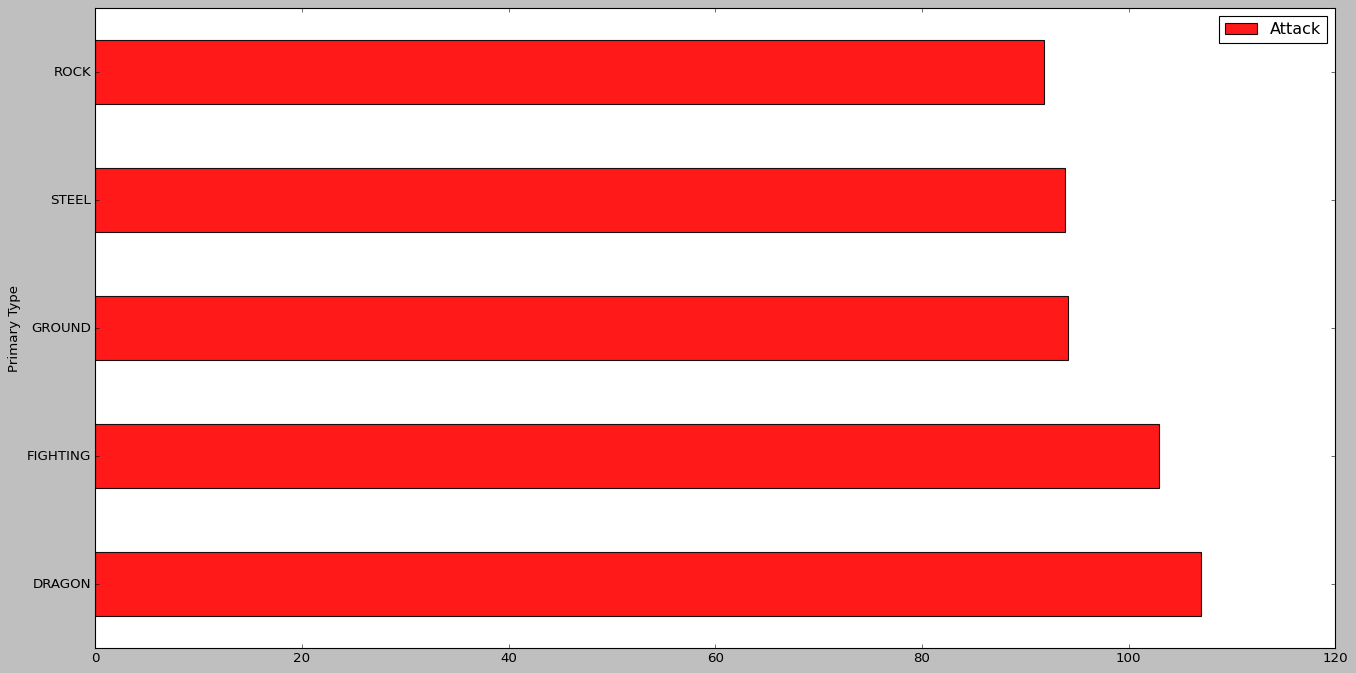

In [24]:
barras=ataque.head(5)
barras.plot(kind='barh',
             figsize=(20,10),
             color='r',
             alpha=0.9)

In [12]:
#Ahora queremos hacer una comparacion entre las estadisticas de mis 3 pokemones legendarios favoritos
#Primero creamos una lista con los datos de unicamente los datos de las columnas que rerepresentan un tipo de stat

In [25]:
stats=list(df.loc[:,'Attack':'Speed'])
stats

['Attack', 'Defense', 'HP', 'Sp.Attack', 'Sp.Defense', 'Speed']

In [29]:
#Ahora ceamos un indice con los datos de los nombres de pokemones

In [26]:
df.set_index('Name',
             inplace=True)
df.head(2)

,Primary Type,Secondary type,Attack,Defense,HP,Sp.Attack,Sp.Defense,Speed,Total
Name,,,,,,,,,
Bulbasaur,GRASS,POISON,49,49,45,65,65,45,318
Ivysaur,GRASS,POISON,62,63,60,80,80,60,405


In [30]:
#Hacemos una grafica de lineas entre mis pokemones legendarios favoritos y sus stats

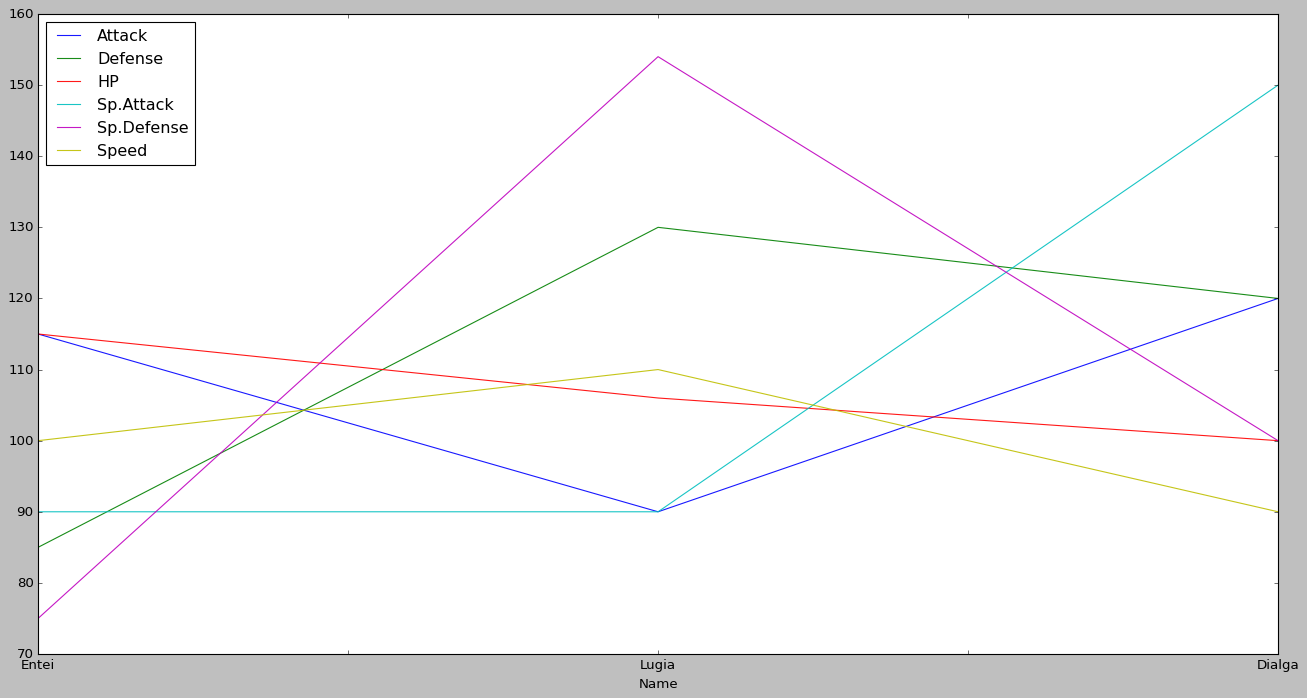

In [27]:
comparar=df.loc[['Entei', 'Lugia', 'Dialga'], stats]
comparar.plot(kind='line',
             figsize=(20,10),
              alpha=0.9
             )

In [31]:
#Nos damos cuenta que la grafica de lineas no sirve tan bien para poder visualizar la informacion asi que hacemos una grafica de barras tambien

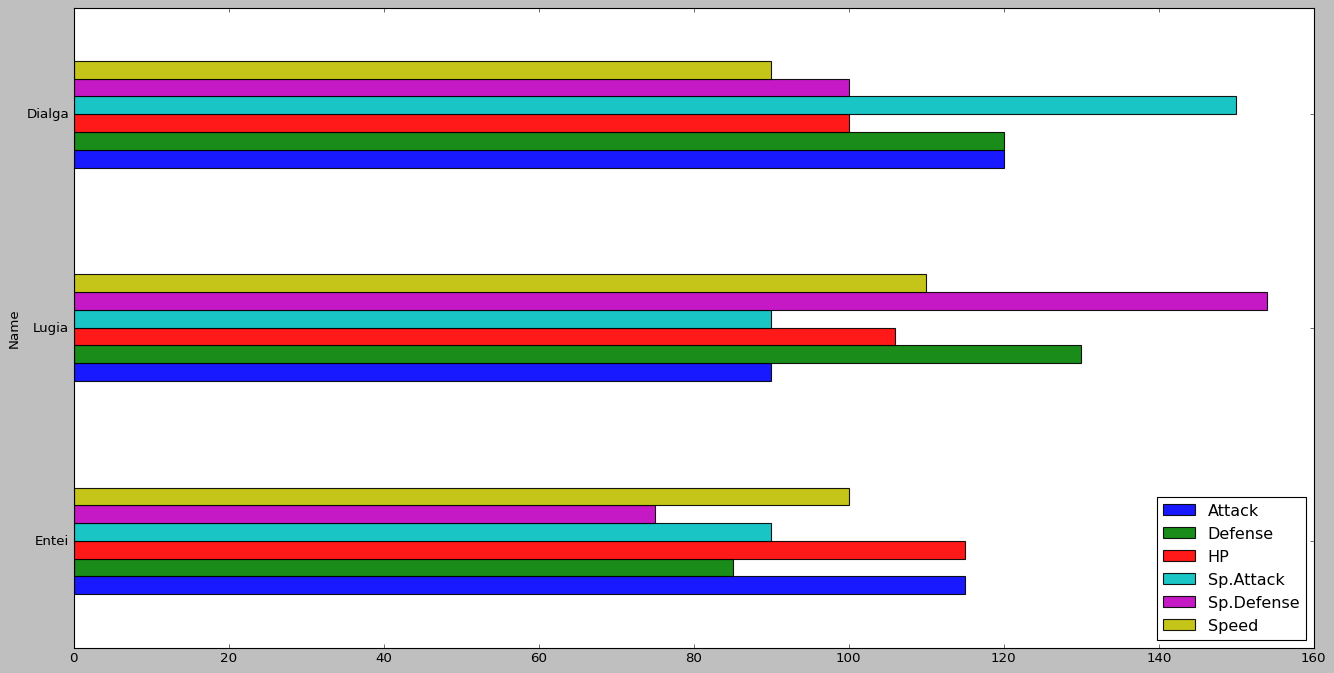

In [28]:
comparar.plot(kind='barh',
             figsize=(20,10),
             alpha=0.9)